In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
plt.rcParams['axes.linewidth'] = 2

In [2]:
import sys
print(sys.executable)

/usr/local/bin/python3


In [3]:
def GetP(t,lam,beta,gNe,gY,thetaX,thetaP):
        
    P0  = 14
    Ne0 = 3.316 # units are billions (10**9)
    A0 = 51.5 # obtained from CD regs

    gX = 0.0508 
    gP = 0.0402 
    gA0 = 0.0130

    thetaN = 1 - thetaX - thetaP
        
    alpha = gA0 / ((Ne0**lam) * (A0**(-beta)))

    A   = ( ((alpha*beta*(Ne0**lam))/(gNe*lam))*(np.exp(gNe*lam*t)-1) + (A0**beta))**(1/beta)
    
    P = P0*np.exp(((1/thetaP) * (gY - (thetaX * gX) - (thetaN * gNe)))*t)/((A/A0)**(1/thetaP)) 
    
    return P
# 

In [4]:
def HelperFun(t,lam,beta,gNe,gY,thetaX,thetaP):
    Plim = 709317
    y = GetP(t,lam,beta,gNe,gY,thetaX,thetaP)-Plim
    return y

/var/folders/bj/4vflyls91mvbj2mnqj253n1h0000gq/T/ipykernel_24768/4170965743.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tau[j]=sol.x
/var/folders/bj/4vflyls91mvbj2mnqj253n1h0000gq/T/ipykernel_24768/4157471755.py:24: RuntimeWarning: overflow encountered in exp
  P = P0*np.exp(((1/thetaP) * (gY - (thetaX * gX) - (thetaN * gNe)))*t)/((A/A0)**(1/thetaP))
/var/folders/bj/4vflyls91mvbj2mnqj253n1h0000gq/T/ipykernel_24768/4157471755.py:24: RuntimeWarning: overflow encountered in power
  P = P0*np.exp(((1/thetaP) * (gY - (thetaX * gX) - (thetaN * gNe)))*t)/((A/A0)**(1/thetaP))
/var/folders/bj/4vflyls91mvbj2mnqj253n1h0000gq/T/ipykernel_24768/4157471755.py:24: RuntimeWarning: invalid value encountered in divide
  P = P0*np.exp(((1/thetaP) * (gY - (thetaX * gX) - (thetaN * gNe)))*t)/((A/A0)**(1/thetaP))
/var/folder

Text(10, -10, '$\\theta_K$=0.5381\n$\\theta_P$=0.0199\n$\\theta_L$=1-$\\theta_K$-$\\theta_P$\n$\\lambda$=1\n$\\beta$=1.045\n$g_L$=0.0136\n$g_y$=$g_Y$-$g_L$')

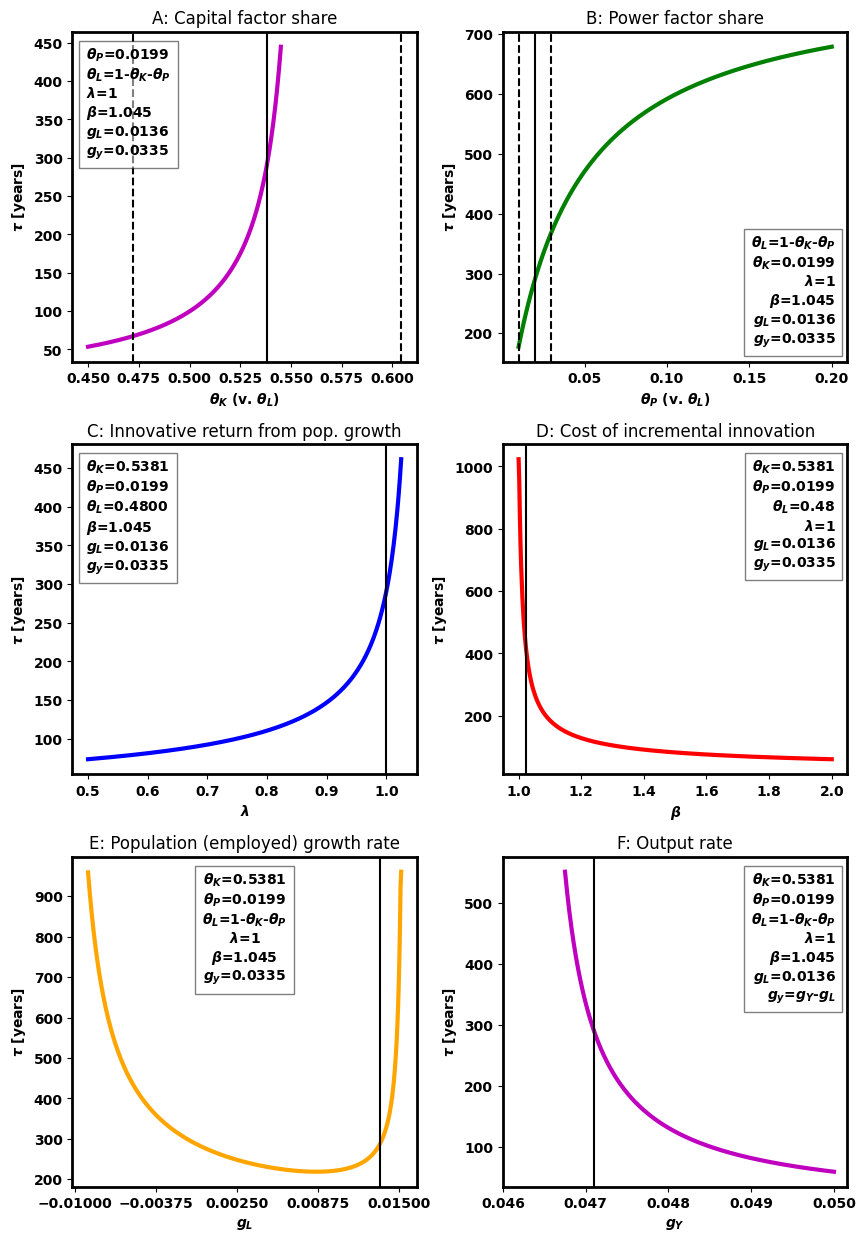

In [7]:
fig = plt.figure(figsize = (10, 15))
plt.subplots_adjust(wspace=0.25, hspace=0.25)

thetaX0 = 0.5381
thetaP0 = 0.0199
thetaN0 = 1 - thetaX0 - thetaP0
lam0   = 1
beta0  = 1.045
gNe0    = 0.0136
gY0 = 0.0471
gy0 = gY0 - gNe0

#####################
# Test thetaX v thetaN
#####################

plt.subplot(3,2,1)

N = 500

lam   = lam0
beta  = beta0
thetaP = thetaP0
thetaX = np.linspace(0.45,0.545,N)
AVE = 0.5381
LB = 0.4719
UB= 0.6043
gNe = gNe0
gY = gY0

tau   = np.zeros(N)

for j in range(N):
    if(thetaX[j]<=0.50): 
        x0=50
    elif(thetaX[j]<0.52):
        x0=200
    elif(thetaX[j]<0.54):
        x0=400
    elif(thetaX[j]<0.55):
        x0=1000
    else:
        x0=2000
    sol = opt.root(HelperFun,x0,args=((lam,beta,gNe,gY,thetaX[j],thetaP)),method='lm')
    if(sol.success):
        tau[j]=sol.x
    else:
        tau[j]=np.nan
        print(j,thetaX[j],sol.message)
plt.plot(thetaX,tau,'m',linewidth=3)
plt.axvline(x=AVE, color='black', linestyle='-')
plt.axvline(x=LB, color='black', linestyle='--')
plt.axvline(x=UB, color='black', linestyle='--')
plt.xlabel(r'$\theta_K$ (v. $\theta_L$)',font)
plt.ylabel(r'$\tau$ [years]',font)
plt.title('A: Capital factor share')
plt.annotate(f'$\\theta_P$={thetaP}\n$\\theta_L$=1-$\\theta_K$-$\\theta_P$\n$\\lambda$={lam}\n$\\beta$={beta}\n$g_L$=0.0136\n$g_y$={gy0}', 
             xy=(0, 1), xytext=(10, -10), 
             xycoords='axes fraction', textcoords='offset points',
             ha='left', va='top',
             bbox=dict(boxstyle='square,pad=0.5', fc='white', alpha=0.5))


#####################
# Test thetaP v thetaX
#####################

plt.subplot(3,2,2)

N = 500

lam   = lam0
beta  = beta0
# thetaN = thetaN0
thetaP = np.linspace(0.01,0.2,N)
AVE = 0.0199
LB = 0.0105
UB= 0.0294
thetaX = 0.5381
gNe = gNe0
gY = gY0

tau   = np.zeros(N)

for j in range(N):
    if(thetaP[j]<=0.7): 
        x0=400
    elif(thetaP[j]<0.1):
        x0=400
    else:
        x0=400
    sol = opt.root(HelperFun,x0,args=((lam,beta,gNe,gY,thetaX,thetaP[j])),method='lm')
    if(sol.success):
        tau[j]=sol.x
    else:
        tau[j]=np.nan
        print(j,thetaP[j],sol.message)
plt.plot(thetaP,tau,'g',linewidth=3)
plt.axvline(x=AVE, color='black', linestyle='-')
plt.axvline(x=LB, color='black', linestyle='--')
plt.axvline(x=UB, color='black', linestyle='--')
plt.xlabel(r'$\theta_P$ (v. $\theta_L$)',font)
plt.ylabel(r'$\tau$ [years]',font)
plt.title('B: Power factor share')
plt.annotate(f'$\\theta_L$=1-$\\theta_K$-$\\theta_P$\n$\\theta_K$=0.0199\n$\\lambda$={lam}\n$\\beta$={beta}\n$g_L$=0.0136\n$g_y$={gy0}', 
             xy=(0.925, 0.08), xytext=(10, -10), 
             xycoords='axes fraction', textcoords='offset points',
             ha='right', va='bottom',
             bbox=dict(boxstyle='square,pad=0.5', fc='white', alpha=0.5))

#####################
# Test lambda
#####################

plt.subplot(3,2,3)

thetaX = thetaX0
thetaP = thetaP0
beta  = beta0
gNe = gNe0
gY = gY0
lam   = np.linspace(0.5,1.025,N)

tau   = np.zeros(N)
x0 = 400

for j in range(N):
    sol = opt.root(HelperFun,x0,args=((lam[j],beta,gNe,gY,thetaX,thetaP)),method='lm')
    if(sol.success):
        tau[j]=sol.x
    else:
        tau[j]=np.nan
        print(j,lam[j],sol.message)
plt.plot(lam,tau,'b',linewidth=3)
plt.axvline(x=1, color='black', linestyle='-')
plt.xlabel(r'$\lambda$',font)
plt.ylabel(r'$\tau$ [years]',font)
plt.title('C: Innovative return from pop. growth')
plt.annotate(f'$\\theta_K$={thetaX}\n$\\theta_P$={thetaP}\n$\\theta_L$=0.4800\n$\\beta$={beta}\n$g_L$=0.0136\n$g_y$={gy0}', 
             xy=(0, 1), xytext=(10, -10), 
             xycoords='axes fraction', textcoords='offset points',
             ha='left', va='top',
             bbox=dict(boxstyle='square,pad=0.5', fc='white', alpha=0.5))

#####################
# Test beta
#####################

plt.subplot(3,2,4)

lam = lam0
beta  = np.linspace(1,2.0,N)
thetaX = thetaX0
thetaP = thetaP0
gNe    = gNe0
gY = gY0

tau   = np.zeros(N)
x0 = 400

for j in range(N):
    sol = opt.root(HelperFun,x0,args=((lam,beta[j],gNe,gY,thetaX,thetaP)),method='lm')
    if(sol.success):
        tau[j]=sol.x
    else:
        tau[j]=np.nan
        print(j,beta[j],sol.message)
plt.plot(beta,tau,'r',linewidth=3)
plt.axvline(x=1.025, color='black', linestyle='-')
plt.xlabel(r'$\beta$',font)
plt.ylabel(r'$\tau$ [years]',font)
plt.title('D: Cost of incremental innovation')
plt.annotate(f'$\\theta_K$={thetaX}\n$\\theta_P$={thetaP}\n$\\theta_L$=0.48\n$\\lambda$={lam}\n$g_L$=0.0136\n$g_y$={gy0}', 
             xy=(.925, 1), xytext=(10, -10), 
             xycoords='axes fraction', textcoords='offset points',
             ha='right', va='top',
             bbox=dict(boxstyle='square,pad=0.5', fc='white', alpha=0.5))

#####################
# Test g_N (holding gy constant)
#####################

plt.subplot(3,2,5)

thetaX = thetaX0
thetaP = thetaP0
lam   = lam0
beta  = beta0
gNe  = np.linspace(-.009,0.0152,N)
gY = gy0 + gNe 

tau   = np.zeros(N)

for j in range(N):
    if(gNe[j]<=-0.008): 
        x0=2000
    elif(gNe[j]<-0.004):
        x0=600
    elif(gNe[j]<=0.014):
        x0=400
    elif(gNe[j]<=0.0145):
        x0=400
    elif(gNe[j]<=0.015):
        x0=600
    else:
        x0=800
    sol = opt.root(HelperFun,x0,args=((lam,beta,gNe[j],gY[j],thetaX,thetaP)),method='lm')
    if(sol.success):
        tau[j]=sol.x
    else:
        tau[j]=np.nan
        print(j,gNe[j],sol.message)
plt.plot(gNe,tau,'orange',linewidth=3)
plt.axvline(x=0.0136, color='black', linestyle='-')
plt.xlabel(r'$g_{L}$',font)
ticks = np.linspace(-0.01, 0.015, 5)
plt.xticks(ticks)
plt.ylabel(r'$\tau$ [years]',font)
plt.title('E: Population (employed) growth rate')
plt.annotate(f'$\\theta_K$={thetaX}\n$\\theta_P$={thetaP}\n$\\theta_L$=1-$\\theta_K$-$\\theta_P$\n$\\lambda$={lam}\n$\\beta$={beta}\n$g_y$={gy0}', 
             xy=(0.5, 1), xytext=(0, -10), 
             xycoords='axes fraction', textcoords='offset points',
             ha='center', va='top',
             bbox=dict(boxstyle='square,pad=0.5', fc='white', alpha=0.5))

#####################
# Test g_y (holding gN constant)
#####################

plt.subplot(3,2,6)

thetaX = thetaX0
thetaP = thetaP0
lam   = lam0
beta  = beta0
gNe   = gNe0
gY = np.linspace(0.04675,0.05,N) 

tau   = np.zeros(N)

for j in range(N):
    if(gY[j]<=-0.046): 
        x0=16000
    elif(gY[j]<-0.047):
        x0=1500
    elif(gY[j]<-0.048):
        x0=400
    else:
        x0=100
    sol = opt.root(HelperFun,x0,args=((lam,beta,gNe,gY[j],thetaX,thetaP)),method='lm')
    if(sol.success):
        tau[j]=sol.x
    else:
        tau[j]=np.nan
        print(j,gY[j],sol.message)
plt.plot(gY,tau,'m',linewidth=3)
plt.axvline(x=0.0471, color='black', linestyle='-')
plt.xlabel(r'$g_{Y}$',font)
ticks = np.linspace(0.046, 0.05, 5)
plt.xticks(ticks)
plt.ylabel(r'$\tau$ [years]',font)
plt.title('F: Output rate')
plt.annotate(f'$\\theta_K$={thetaX}\n$\\theta_P$={thetaP}\n$\\theta_L$=1-$\\theta_K$-$\\theta_P$\n$\\lambda$={lam}\n$\\beta$={beta}\n$g_L$=0.0136\n$g_y$=$g_Y$-$g_L$', 
             xy=(.925, 1), xytext=(10, -10), 
             xycoords='axes fraction', textcoords='offset points',
             ha='right', va='top',
             bbox=dict(boxstyle='square,pad=0.5', fc='white', alpha=0.5))

             